In [1]:
from sqlalchemy import create_engine
import pandas as pd

# Create a SQLAlchemy engine
engine = create_engine('sqlite:///social_media_data.db')

# Define the file paths
file_path1 = "/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/social_media-US-monthly-200904-202312.csv"
file_path2 = "/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/google_trends_social_media_data.csv"

# Read the CSV files into dataframes
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Write the dataframes to SQLite tables
df1.to_sql('us_social_media', engine, if_exists='replace', index=False)
df2.to_sql('google_trends', engine, if_exists='replace', index=False)

180

In [2]:
# Select all records from the 'us_social_media' table
df1 = pd.read_sql_query("SELECT * FROM us_social_media", engine)

# Select all records from the 'google_trends' table
df2 = pd.read_sql_query("SELECT * FROM google_trends", engine)

# Print the first 5 rows of each dataframe
print(df1.head())
print(df2.head())

      Date  Facebook  Pinterest  Twitter  StumbleUpon  reddit  Tumblr  \
0  2009-04     12.89        0.0     6.69        42.45    9.83     0.0   
1  2009-05     15.88        0.0    10.45        42.55    9.10     0.0   
2  2009-06     17.02        0.0    11.25        38.08   14.80     0.0   
3  2009-07     19.08        0.0    10.55        43.41   11.64     0.0   
4  2009-08     24.45        0.0    11.37        38.84   11.85     0.0   

   YouTube  Instagram  LinkedIn  Digg  MySpace  Fark  Google+  NowPublic  \
0      0.0        0.0      0.00  6.02    19.04  0.30      0.0       0.03   
1      0.0        0.0      0.27  6.85    11.06  0.65      0.0       0.04   
2      0.0        0.0      0.50  5.17     9.46  1.03      0.0       0.05   
3      0.0        0.0      0.40  5.05     6.86  0.34      0.0       0.05   
4      0.0        0.0      0.45  3.92     5.85  0.64      0.0       0.08   

   news.ycombinator.com  Delicious  VKontakte  Vimeo  Other  
0                  0.08       0.38        

      Date  Facebook  Pinterest  Twitter  StumbleUpon  reddit  Tumblr  \
0  2009-04     12.89        0.0     6.69        42.45    9.83     0.0   
1  2009-05     15.88        0.0    10.45        42.55    9.10     0.0   
2  2009-06     17.02        0.0    11.25        38.08   14.80     0.0   
3  2009-07     19.08        0.0    10.55        43.41   11.64     0.0   
4  2009-08     24.45        0.0    11.37        38.84   11.85     0.0   

   YouTube  Instagram  LinkedIn  Digg  MySpace  Fark  Google+  NowPublic  \
0      0.0        0.0      0.00  6.02    19.04  0.30      0.0       0.03   
1      0.0        0.0      0.27  6.85    11.06  0.65      0.0       0.04   
2      0.0        0.0      0.50  5.17     9.46  1.03      0.0       0.05   
3      0.0        0.0      0.40  5.05     6.86  0.34      0.0       0.05   
4      0.0        0.0      0.45  3.92     5.85  0.64      0.0       0.08   

   news.ycombinator.com  Delicious  VKontakte  Vimeo  Other  
0                  0.08       0.38        

Dropdown(description='Platform:', options=('Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'reddit', 'Tumbl…

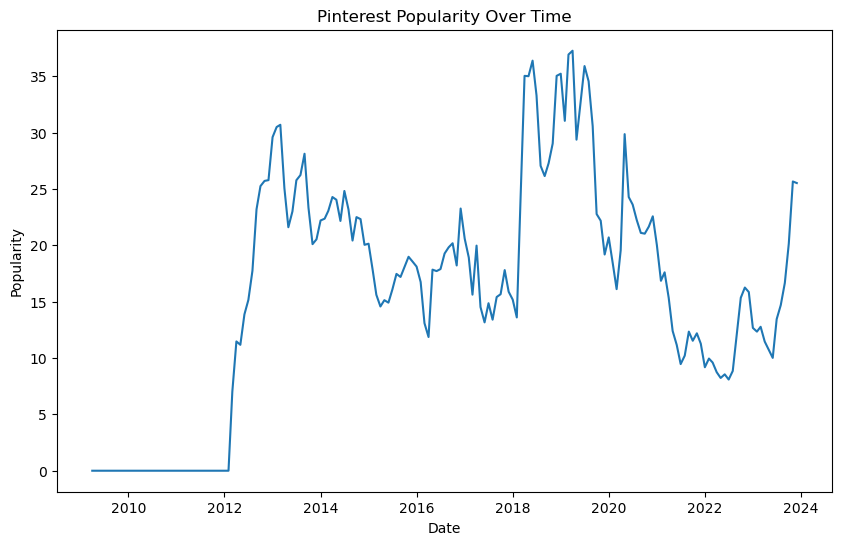

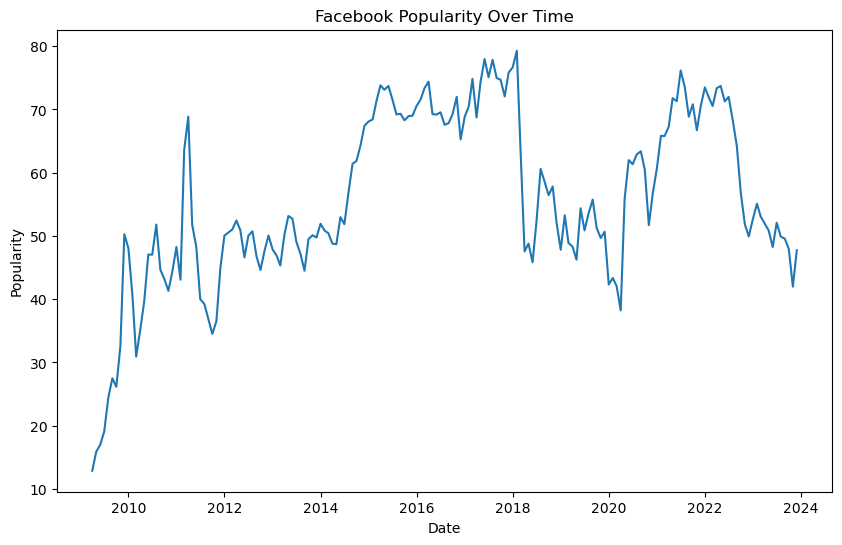

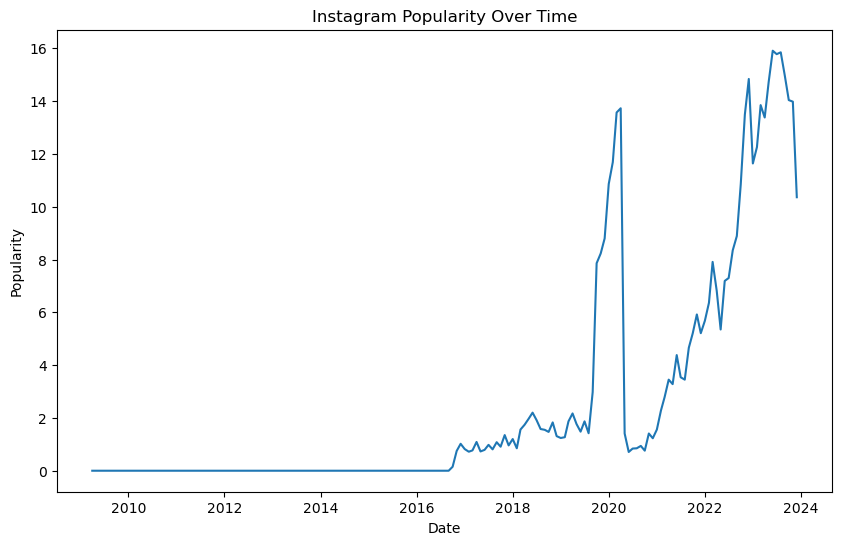

In [3]:
# Select all records from the 'us_social_media' table
df1 = pd.read_sql_query("SELECT * FROM us_social_media", engine)

# Print the first 5 rows of the dataframe
print(df1.head())

# Print the statistical summary of the dataframe
print(df1.describe())

# Print the number of missing values in each column
print(df1.isnull().sum())

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown menu
dropdown = widgets.Dropdown(
    options=['Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'reddit', 'Tumblr', 'YouTube', 'Instagram', 'LinkedIn', 'Digg', 'MySpace', 'Fark', 'Google+', 'NowPublic', 'news.ycombinator.com', 'Delicious', 'VKontakte', 'Vimeo', 'Other'],
    value='Facebook',
    description='Platform:',
)

# Function to plot data
def plot_data(platform):
    plt.figure(figsize=(10,6))
    plt.plot(pd.to_datetime(df1['Date']), df1[platform])
    plt.title(f'{platform} Popularity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.show()

# Function to handle changes in the dropdown menu
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_data(change['new'])

dropdown.observe(on_change)

display(dropdown)